# Stock Price Prediction Using LSTM
**Purpose**

The purpose of this project is to leverage machine learning techniques, specifically Long Short-Term Memory (LSTM) networks, to predict future stock prices based on historical data. Accurate stock price predictions can help investors make informed decisions, identify trends, and potentially increase their returns.

**Objective**

Predict Future Stock Prices: Develop an LSTM-based model to predict future closing prices of a specific stock based on historical closing prices.
Evaluate Model Performance: Assess the performance of the LSTM model using appropriate metrics and compare it with baseline models.
Provide Insights: Generate insights from the predictions and understand the limitations and potential of using LSTM for stock price forecasting.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./AAPL.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900
10953,2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600


#Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10955 entries, 0 to 10954
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10955 non-null  object 
 1   Open       10955 non-null  float64
 2   High       10955 non-null  float64
 3   Low        10955 non-null  float64
 4   Close      10955 non-null  float64
 5   Adj Close  10955 non-null  float64
 6   Volume     10955 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 599.2+ KB


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10955.000000,10955.000000,10955.000000,10955.000000,10955.000000,1.095500e+04
mean,21.546394,21.777535,21.323536,21.559448,20.762955,3.190548e+08
std,44.486010,44.959582,44.040756,44.519551,44.066610,3.357389e+08
min,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00
25%,0.296875,0.303571,0.290179,0.296875,0.241624,1.139578e+08
50%,0.522321,0.533482,0.513393,0.524554,0.427539,2.067072e+08
75%,19.773929,19.891429,19.471964,19.691787,17.051040,3.993080e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,7.421641e+09


In [ ]:
df.index

RangeIndex(start=0, stop=10955, step=1)

**I delete columns that doesnt help in the prediction, wich is dividents and stock splist.**

**The stock market can vary from year to year, so I only get the row from 1990 to update**

In [ ]:
df = df.loc["1990-01-01":].copy()
df

,Date,Open,High,Low,Close,Adj Close,Volume
1991,1988-10-27,0.345982,0.350446,0.341518,0.348214,0.271672,143684800
1992,1988-10-28,0.348214,0.352679,0.343750,0.343750,0.268189,84481600
1993,1988-10-31,0.345982,0.345982,0.334821,0.344866,0.269060,242905600
1994,1988-11-01,0.343750,0.345982,0.337054,0.339286,0.264707,143696000
1995,1988-11-02,0.341518,0.341518,0.328125,0.332589,0.259482,208521600
...,...,...,...,...,...,...,...
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900
10953,2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600


In [ ]:
df = df[['Date', 'Close']]
df

,Date,Close
1991,1988-10-27,0.348214
1992,1988-10-28,0.343750
1993,1988-10-31,0.344866
1994,1988-11-01,0.339286
1995,1988-11-02,0.332589
...,...,...
10950,2024-05-21,192.350006
10951,2024-05-22,190.899994
10952,2024-05-23,186.880005
10953,2024-05-24,189.979996


In [ ]:
import datetime

def str_2_date(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_obj = str_2_date('1993-03-09')
datetime_obj

datetime.datetime(1993, 3, 9, 0, 0)

In [ ]:
df['Date'] = df['Date'].apply(str_2_date)
df['Date']

<ipython-input-39-d165b9b9d5f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_2_date)


1991    1988-10-27
1992    1988-10-28
1993    1988-10-31
1994    1988-11-01
1995    1988-11-02
           ...    
10950   2024-05-21
10951   2024-05-22
10952   2024-05-23
10953   2024-05-24
10954   2024-05-28
Name: Date, Length: 8964, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1988-10-27,0.348214
1988-10-28,0.343750
1988-10-31,0.344866
1988-11-01,0.339286
1988-11-02,0.332589
...,...
2024-05-21,192.350006
2024-05-22,190.899994
2024-05-23,186.880005


**Lo que haremos es mostrar el index (que son los dias de compra).**

**Eje x: Fechas**

**Eje y: Precio de cierre de la acción**

<Axes: xlabel='Date'>

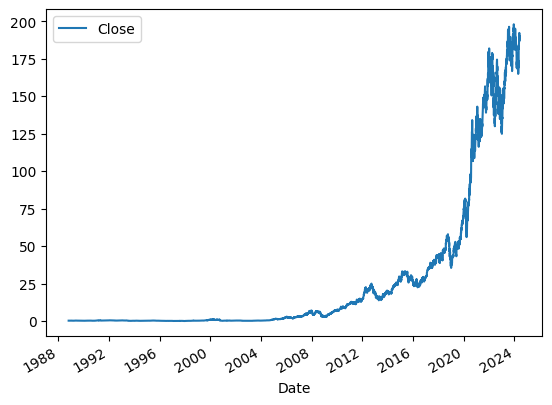

In [ ]:
df.plot.line(y="Close", use_index=True)

**Because I´m using the LSTM, I need to convert this into a supervised learning model.**

**The purpose of this function is to transform a time series dataframe into a supervised learning dataset suitable for training an LSTM**

In [ ]:
import numpy as np

def df_2_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  #Convert the input date string  to datetime objs
  first_date = str_2_date(first_date_str)
  last_date = str_2_date(last_date_str)

  # Initialize the target date with the first date
  target_date = first_date

  # Initiliaze lists to store the dates, features (X), and targets(y)
  dates = []
  X = []
  Y = []

  #Flag to check if we've reached the last date
  last_time = False

  while True:
    #Extract The last n+1 rows up to the current target date
    df_subset = df.loc[:target_date].tail(n+1)

    # Ensure the subset length is n+1; otherwise, the window is too large
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    # Extract the 'Close' prices as a numpy array
    values = df_subset['Close'].to_numpy()

    # Split the values into features(x) and target(y)
    x, y = values[:-1], values[-1]

    # Append the current target date, features, and target to the respective lists
    dates.append(target_date)
    X.append(x)
    Y.append(y)

    ''' Move to the next target date (one week ahead)
     This step is done to simulate a realistic scenario where predictions are made periodically
     It also ensures we do not overlap with weekends or holidays, common in financial data'''
    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]

    ''' Convert the next date to a string and parse it to get the year, month, and day
     This ensures we correctly handle date formats and move to the next valid date in the dataset'''

    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    # Update the target date to the next date
    target_date = next_date

    # This ensures the loop terminates after processing the final target date
    if target_date == last_date:
      last_time = True

  # Create a DataFrame to store the results
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  # Convert the list of features to numpy array

  X = np.array(X)

  for i in range(0, n):
    X[:, i]
    # Add each feature column to the dataframe
    ret_df[f'Target-{n-i}'] = X[:, i]

  # Add the target column to the Dataframe
  ret_df['Target'] = Y

  return ret_df


# Start day second time around: '2021-03-25'
windowed_df = df_2_windowed_df(df,
                                '2022-05-24',
                                '2024-05-28',
                                n=28)
windowed_df

,Target Date,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,Target-21,Target-20,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2022-05-24,170.399994,165.289993,165.070007,167.399994,167.229996,166.419998,161.789993,162.880005,156.800003,...,146.500000,142.559998,147.110001,145.539993,149.240005,140.820007,137.350006,137.589996,143.110001,140.360001
1,2022-05-25,165.289993,165.070007,167.399994,167.229996,166.419998,161.789993,162.880005,156.800003,156.570007,...,142.559998,147.110001,145.539993,149.240005,140.820007,137.350006,137.589996,143.110001,140.360001,140.520004
2,2022-05-26,165.070007,167.399994,167.229996,166.419998,161.789993,162.880005,156.800003,156.570007,163.639999,...,147.110001,145.539993,149.240005,140.820007,137.350006,137.589996,143.110001,140.360001,140.520004,143.779999
3,2022-05-27,167.399994,167.229996,166.419998,161.789993,162.880005,156.800003,156.570007,163.639999,157.649994,...,145.539993,149.240005,140.820007,137.350006,137.589996,143.110001,140.360001,140.520004,143.779999,149.639999
4,2022-05-31,167.229996,166.419998,161.789993,162.880005,156.800003,156.570007,163.639999,157.649994,157.960007,...,149.240005,140.820007,137.350006,137.589996,143.110001,140.360001,140.520004,143.779999,149.639999,148.839996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2024-05-21,175.039993,176.550003,172.690002,169.380005,168.000000,167.039993,165.000000,165.839996,166.899994,...,182.740005,184.570007,183.050003,186.279999,187.429993,189.720001,189.839996,189.869995,191.039993,192.350006
501,2024-05-22,176.550003,172.690002,169.380005,168.000000,167.039993,165.000000,165.839996,166.899994,169.020004,...,184.570007,183.050003,186.279999,187.429993,189.720001,189.839996,189.869995,191.039993,192.350006,190.899994
502,2024-05-23,172.690002,169.380005,168.000000,167.039993,165.000000,165.839996,166.899994,169.020004,169.889999,...,183.050003,186.279999,187.429993,189.720001,189.839996,189.869995,191.039993,192.350006,190.899994,186.880005
503,2024-05-24,169.380005,168.000000,167.039993,165.000000,165.839996,166.899994,169.020004,169.889999,169.300003,...,186.279999,187.429993,189.720001,189.839996,189.869995,191.039993,192.350006,190.899994,186.880005,189.979996


In [ ]:
dates = pd.date_range(start='2022-05-22', end='2024-05-28', freq='B')  # 'B' frequency means business days
df_dates = pd.DataFrame(df, index=dates)
df_dates

,Close
2022-05-23,143.110001
2022-05-24,140.360001
2022-05-25,140.520004
2022-05-26,143.779999
2022-05-27,149.639999
...,...
2024-05-22,190.899994
2024-05-23,186.880005
2024-05-24,189.979996
2024-05-27,NaN


In [ ]:
def windowe_df_2_date_X_y(windowed_dataframe):
    # Convert the windowed DataFrame to a numpy array for easier manipulation
    df_as_np = windowed_dataframe.to_numpy()

    # Extract the first column (dates) from the numpy array
    dates = df_as_np[:, 0]

    # Extract all columns except the first (dates) and last (target) columns
    middle_matrix = df_as_np[:, 1:-1]

    # Reshape the middle matrix to be 3D: (number of samples, number of features, 1)
    # This is required because LSTM expects input shape (batch_size, timesteps, features)
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    # Extract the last column (targets) from the numpy array
    Y = df_as_np[:, -1]

    # Return the dates, features (X), and targets (Y) with features and targets cast to float32
    return dates, X.astype(np.float32), Y.astype(np.float32)

# Example usage:
dates, X, y = windowe_df_2_date_X_y(windowed_df)

# Print the shapes of the returned arrays
dates.shape, X.shape, y.shape


((505,), (505, 28, 1), (505,))

# Training

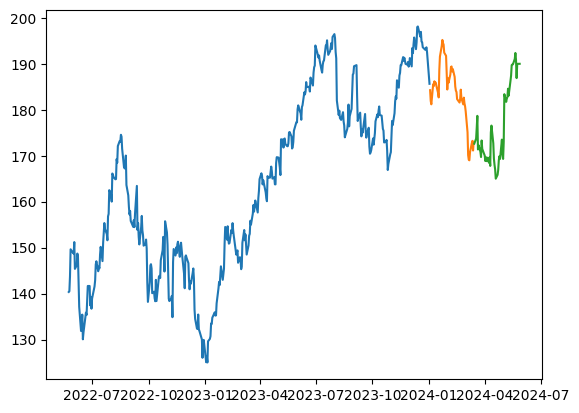

In [ ]:
# 80% of the data is used for training, 10% for validation, and 10% for testing
q_80 = int(len(dates) * .8)  # 80% of the data
q_90 = int(len(dates) * .9)  # 90% of the data

# Split the dates, features (X), and targets (y) into training sets
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

# Split into validation sets
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# Split into test sets
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)  # Plot training data
plt.plot(dates_val, y_val)      # Plot validation data
plt.plot(dates_test, y_test)    # Plot test data

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((28, 1)),
                    layers.LSTM(200),
                    layers.Dense(100, activation='relu'),
                    layers.Dense(50, activation='relu'),
                    layers.Dense(25, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000)

Epoch 1/1000
13/13 [==============================] - 4s 87ms/step - loss: 27136.3047 - mean_absolute_error: 163.6142 - val_loss: 33736.3867 - val_mean_absolute_error: 183.5493
Epoch 2/1000
13/13 [==============================] - 1s 50ms/step - loss: 27039.4805 - mean_absolute_error: 163.3186 - val_loss: 33635.4570 - val_mean_absolute_error: 183.2742
Epoch 3/1000
13/13 [==============================] - 1s 45ms/step - loss: 26951.3887 - mean_absolute_error: 163.0486 - val_loss: 33523.0898 - val_mean_absolute_error: 182.9674
Epoch 4/1000
13/13 [==============================] - 1s 49ms/step - loss: 26820.4453 - mean_absolute_error: 162.6470 - val_loss: 33338.8203 - val_mean_absolute_error: 182.4632
Epoch 5/1000
13/13 [==============================] - 1s 51ms/step - loss: 26642.3789 - mean_absolute_error: 162.0989 - val_loss: 33132.0938 - val_mean_absolute_error: 181.8958
Epoch 6/1000
13/13 [==============================] - 1s 50ms/step - loss: 26460.0938 - mean_absolute_error: 161.53

# Its easier to observe that happens with the predictions.

13/13 [==============================] - 1s 18ms/step


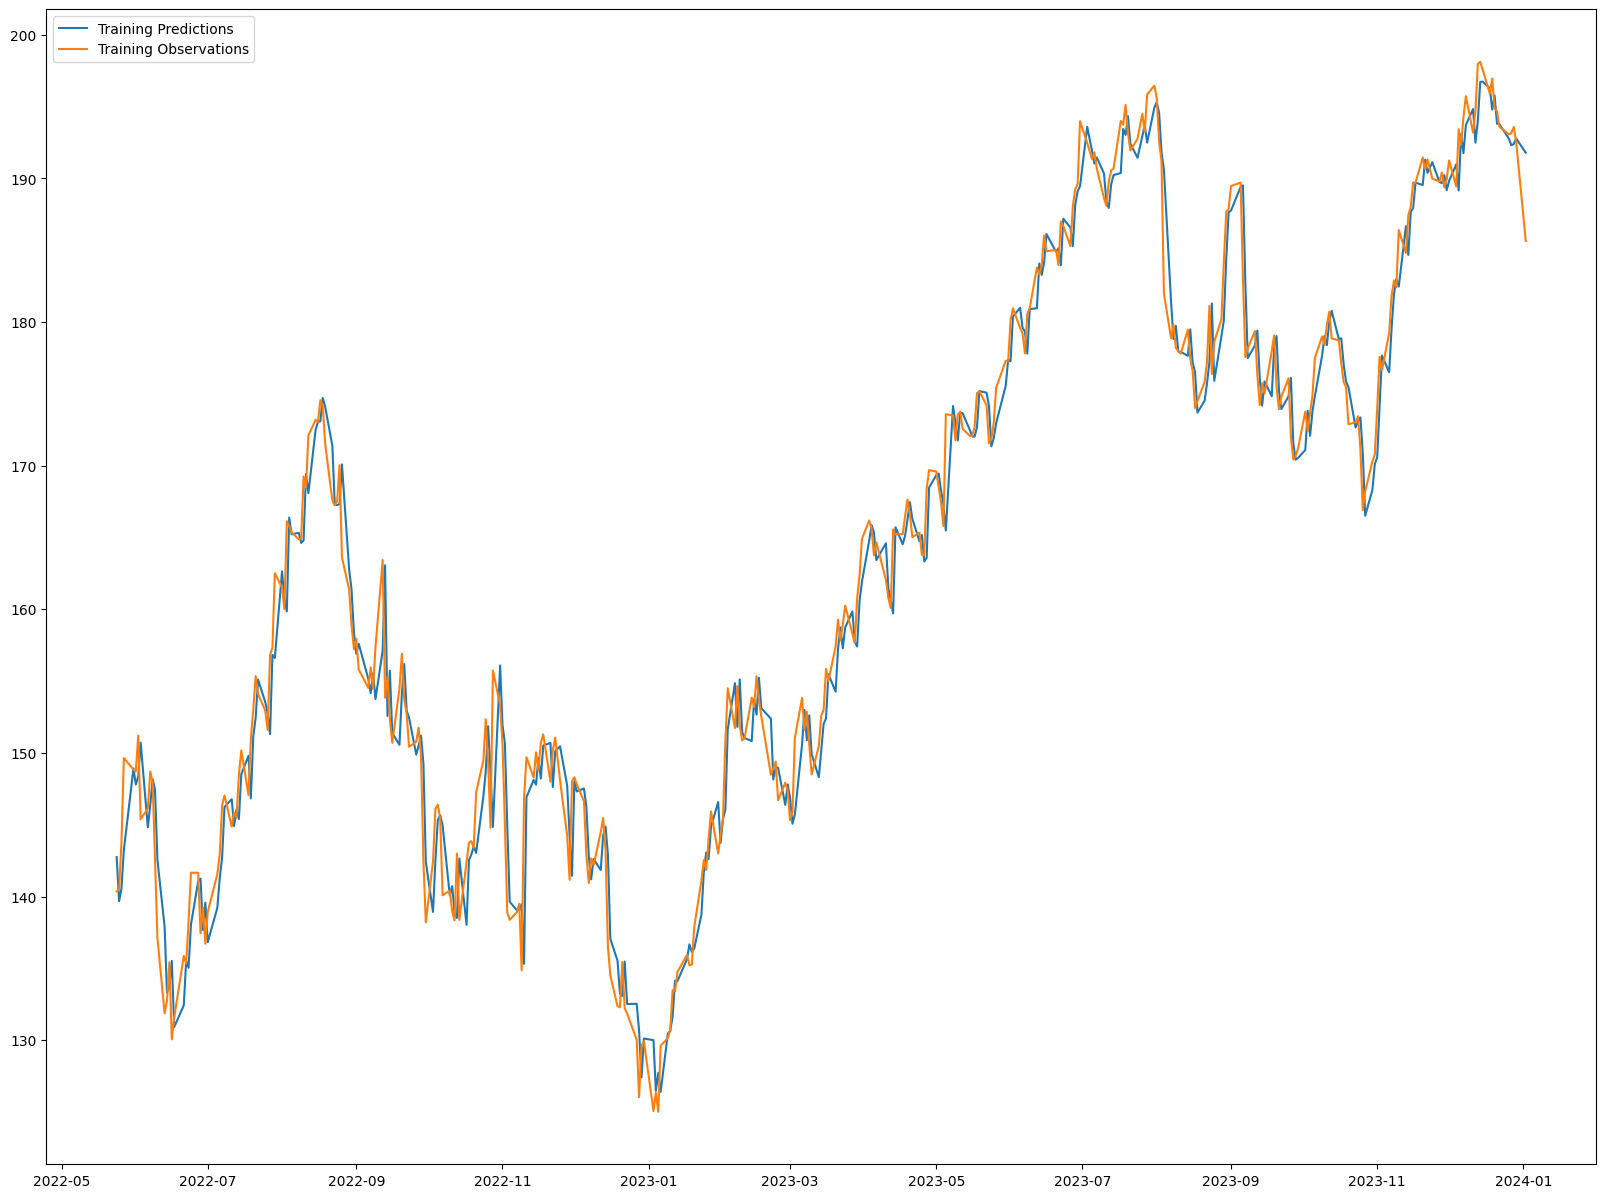

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(20, 15))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 13ms/step


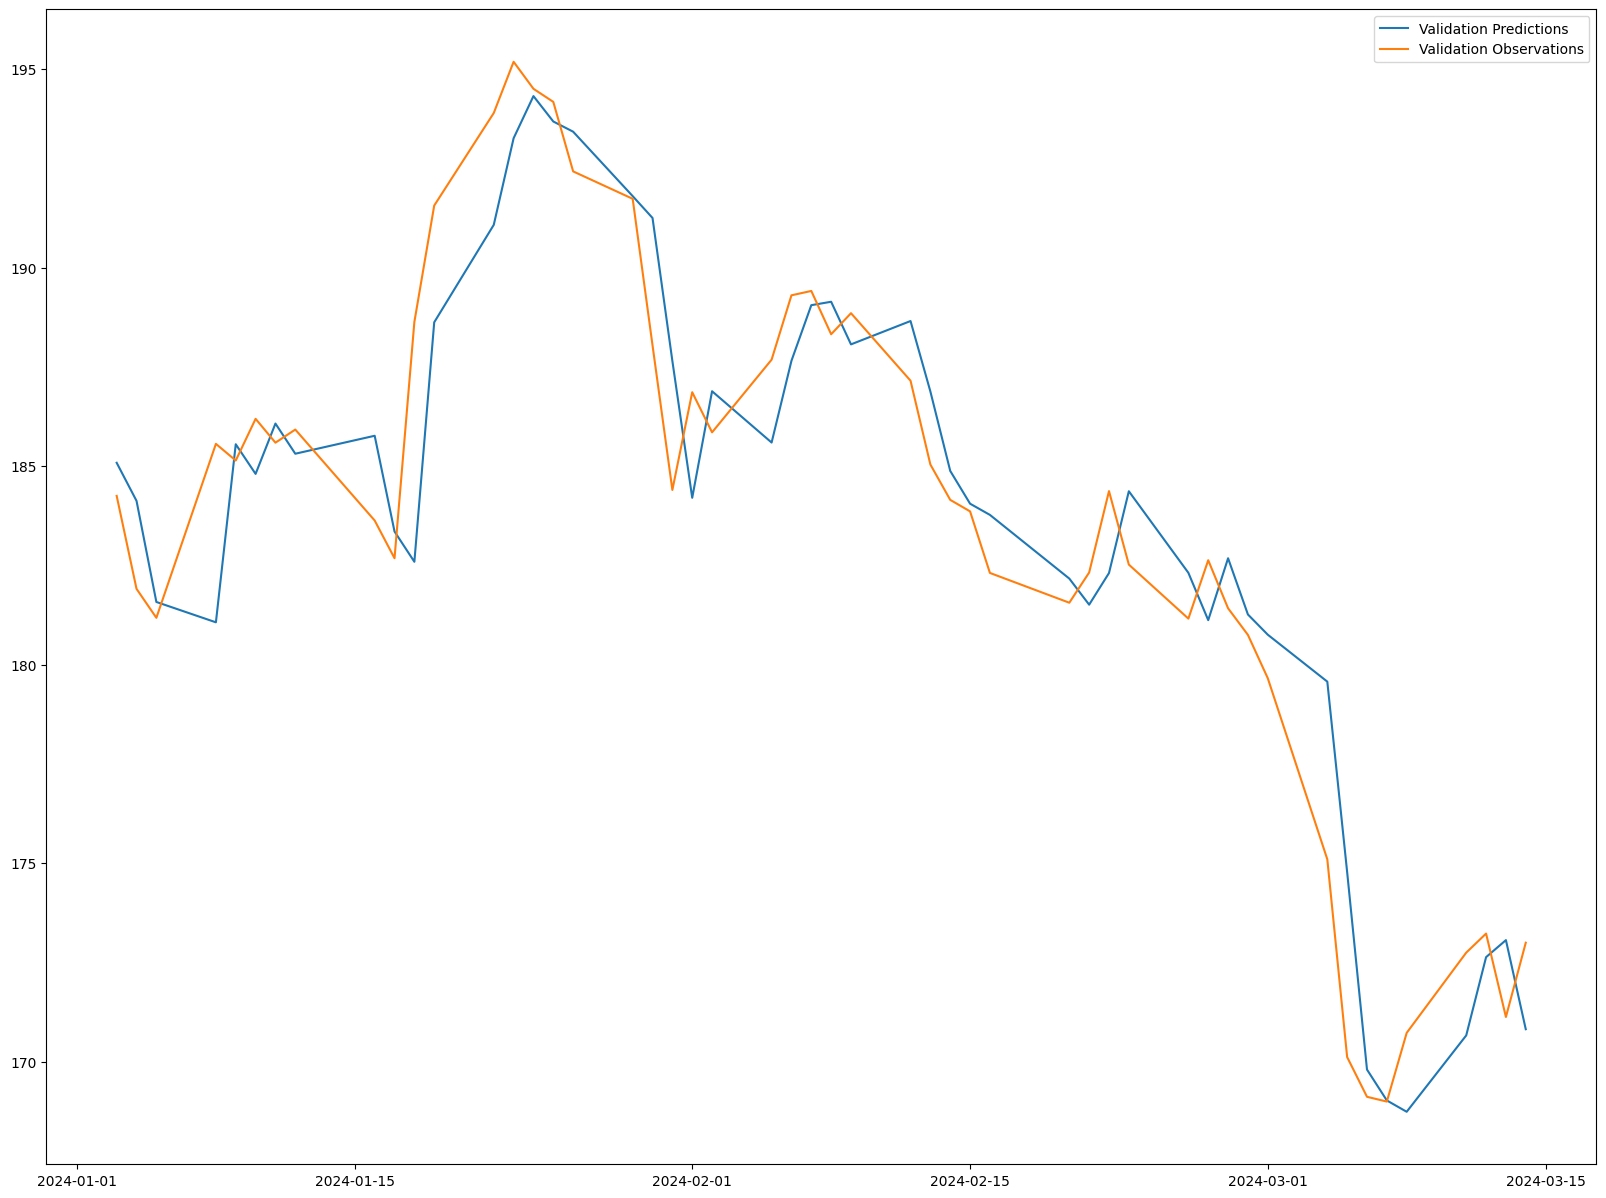

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(20, 15))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 14ms/step


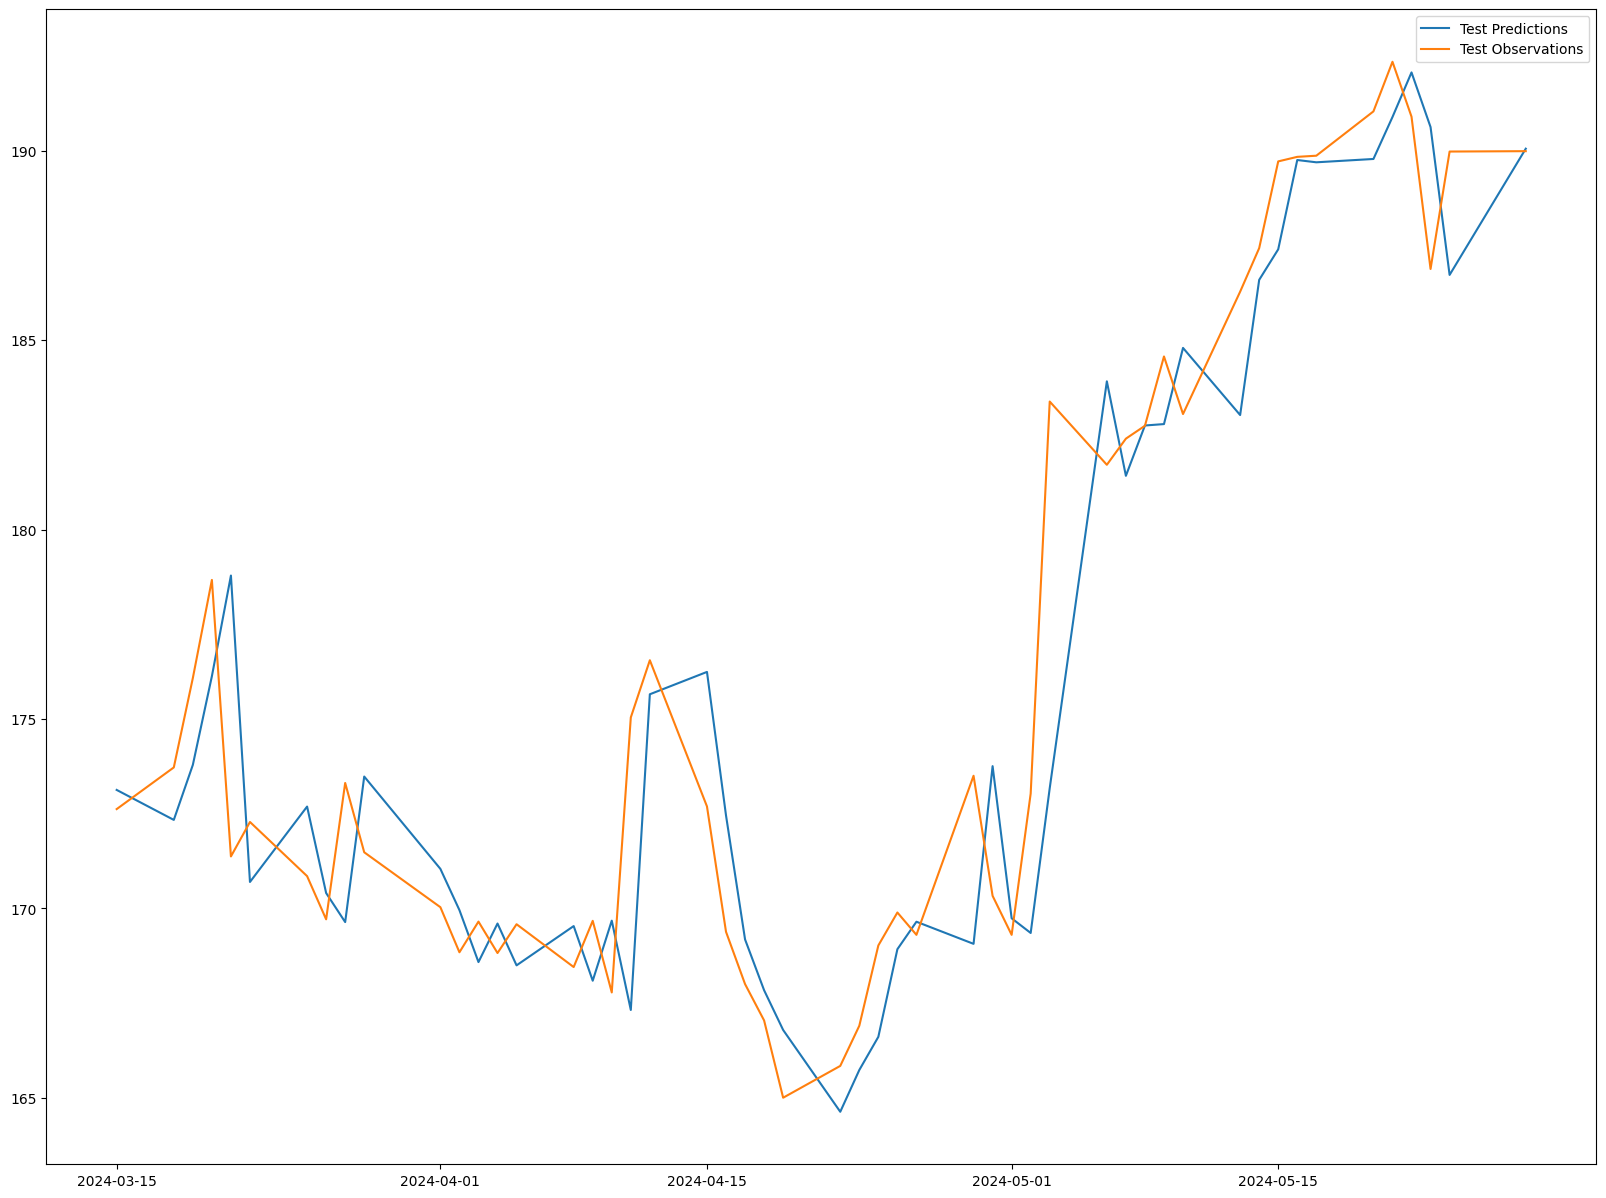

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(20, 15))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])

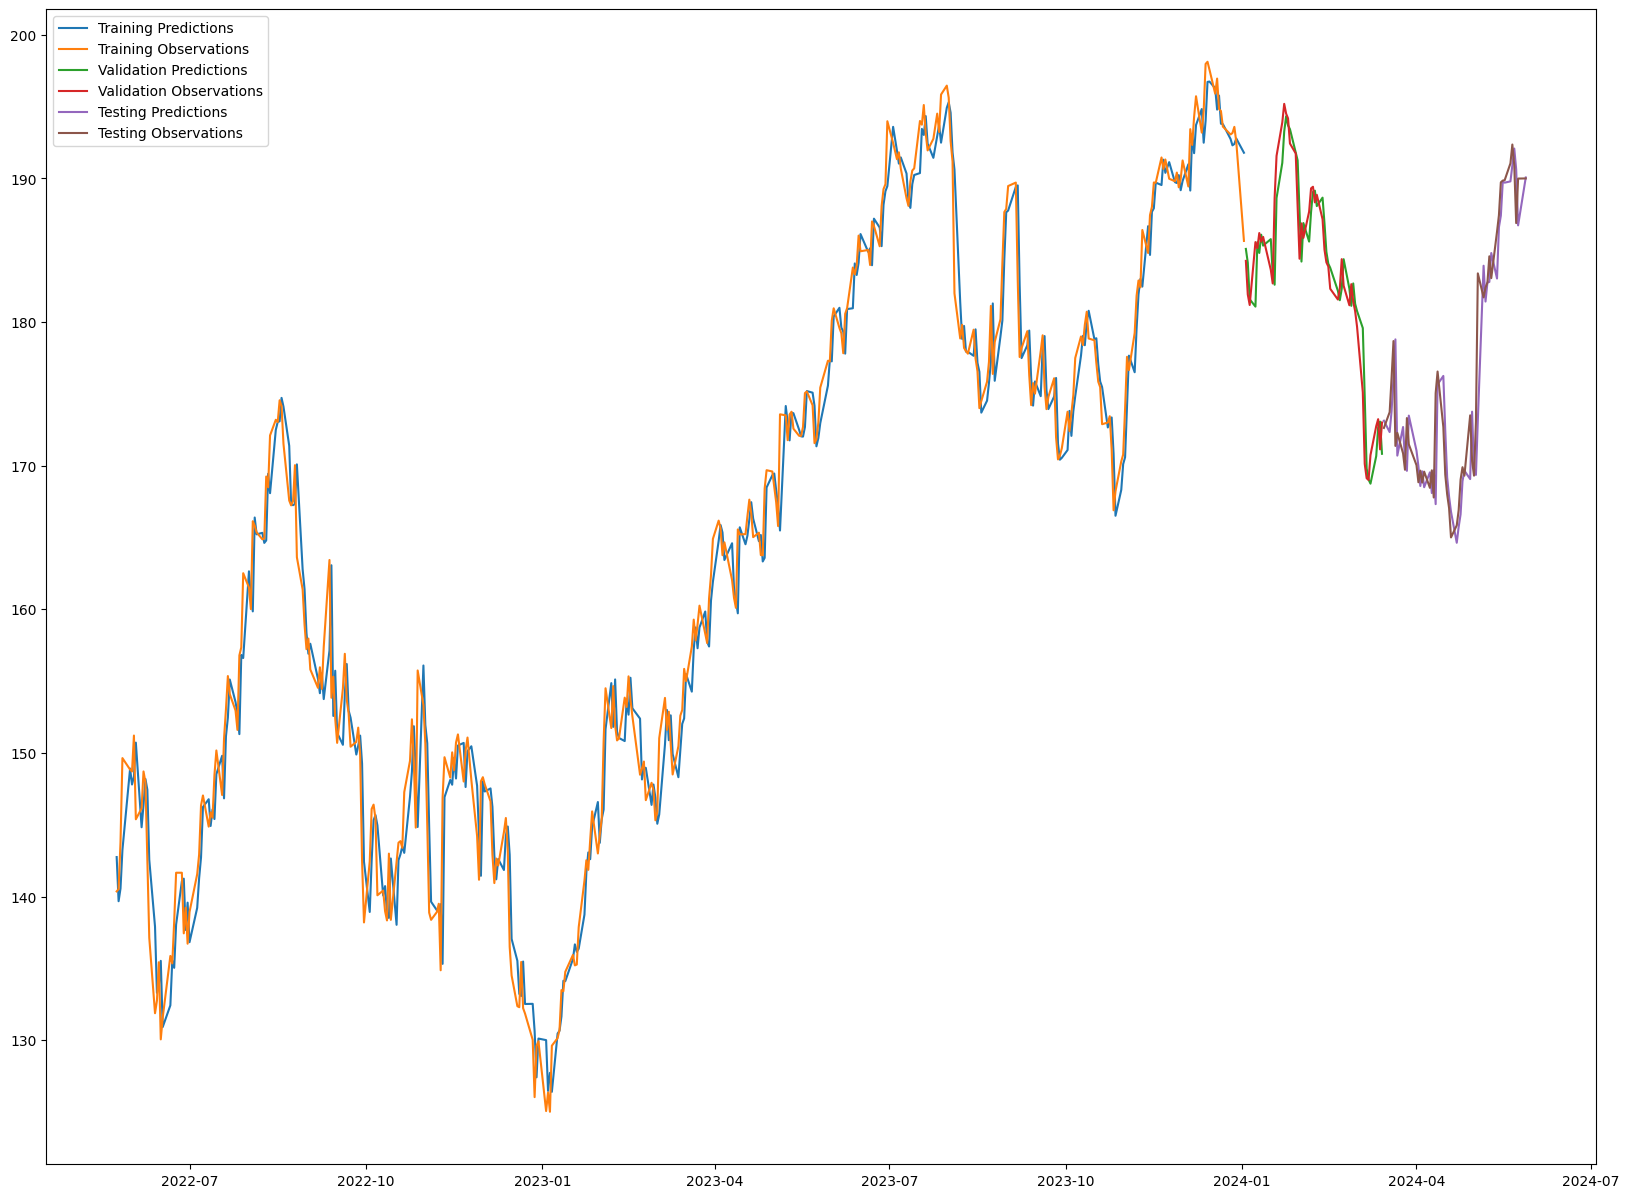

In [ ]:
plt.figure(figsize=(20, 15))

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
X_test.shape

(51, 28, 1)

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 34ms/step


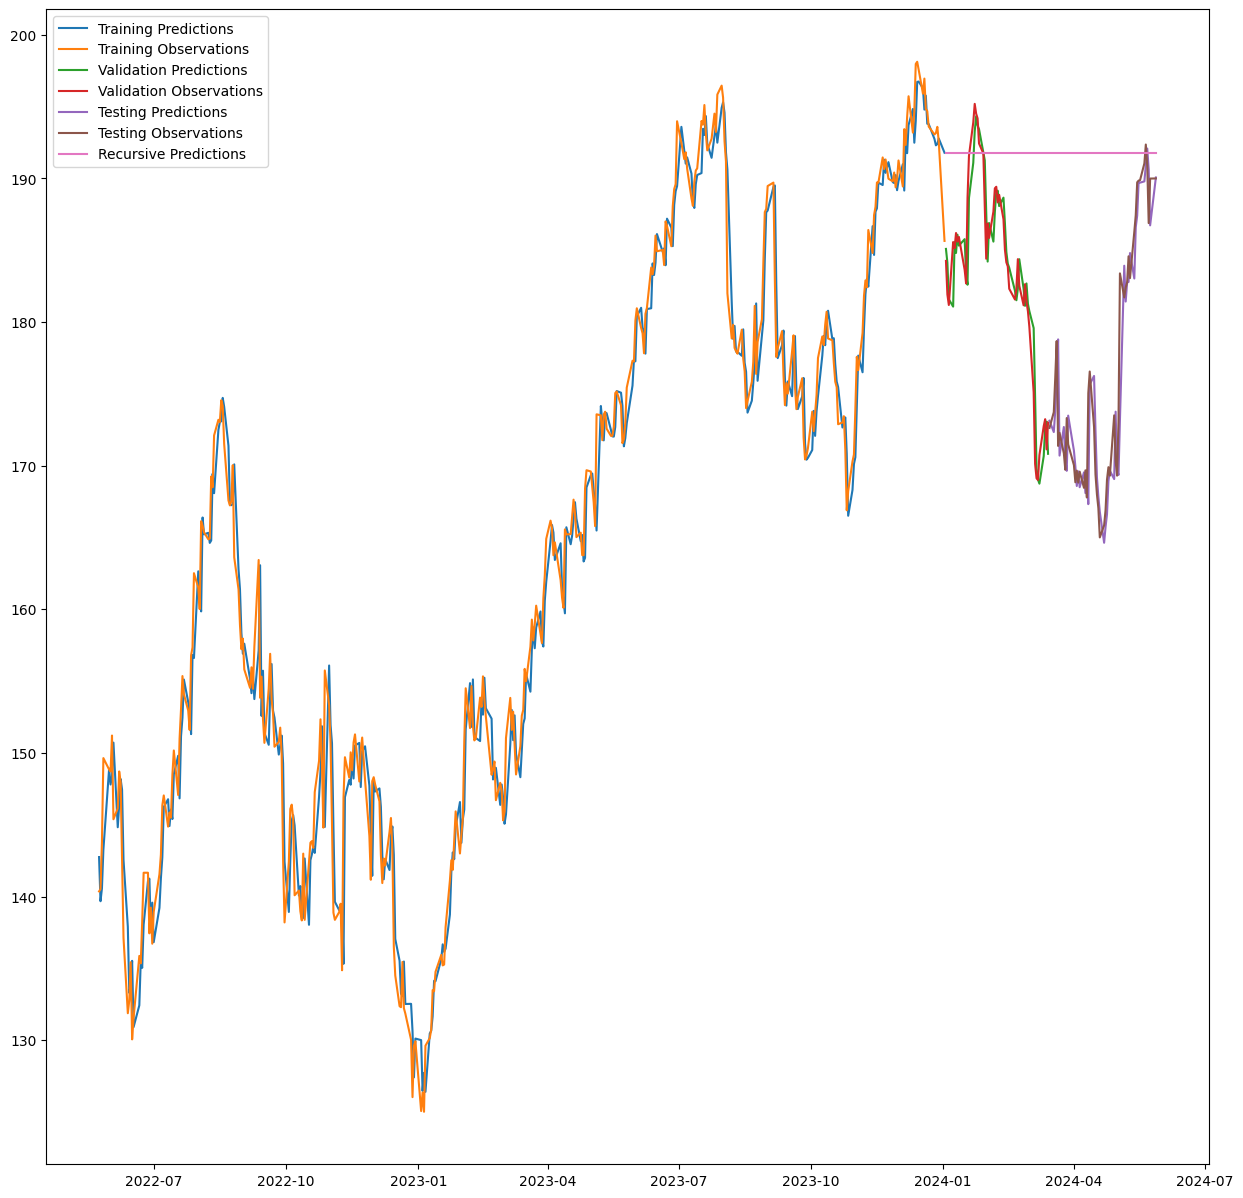

In [ ]:
plt.figure(figsize=(15, 15))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)

plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [ ]:
# Make predictions for the next day for the entire dataset
def predict_next_day_for_dataset(model, X_data):
    predictions = []
    for i in range(len(X_data)):
        # Reshape the input data for prediction
        X_pred = X_data[i].reshape(1, -1, 1)

        # Make prediction using the model
        prediction = model.predict(X_pred)[0][0]
        predictions.append(prediction)

    return predictions

# Predict the next day for the entire dataset
predictions = predict_next_day_for_dataset(model, X_test)

# Assuming 'dates_test' contains the last date in the dataset
# Extend 'dates_test' to include the next day
next_day_date = dates_test[-1] + datetime.timedelta(days=3)
dates_test = np.append(dates_test, next_day_date)

# Print the prediction for the next day
print(f'Prediction for {next_day_date}: {predictions[-1]}')

1/1 [==============================] - 0s 23ms/step
Prediction for 2024-05-31 00:00:00: 190.0557098388672


# Conclusion

#**This model that was trained with LSTM is only able to predict on a micro scale, I mean it is only possible to make predictions of the closing of the stock for the next day or perhaps two days in the future. It is not possible to use this model for very future predictions.**